In [93]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [94]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [95]:
raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=0)

In [96]:
raw_data[0:5]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


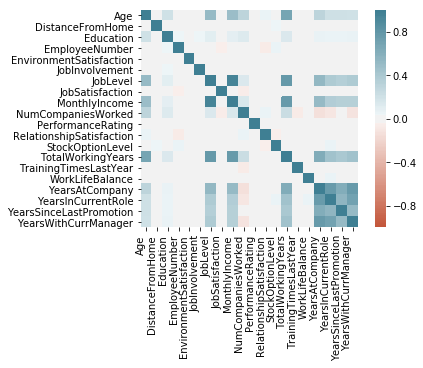

In [97]:
attribute = raw_data.iloc[:,0:27]
corr = attribute.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [98]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [99]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfacti

In [124]:
categorical_col = []
numeric_col = []
for col in raw_data.columns:
    #print(raw_data[col].dtype)
    if raw_data[col].dtype == object and col != "Attrition":
        categorical_col.append(col)
        print(col, raw_data[col].unique())
        print("========================================================================")
    elif col != "Attrition":
        #print("numeric")
        numeric_col.append(col)

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']


In [101]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

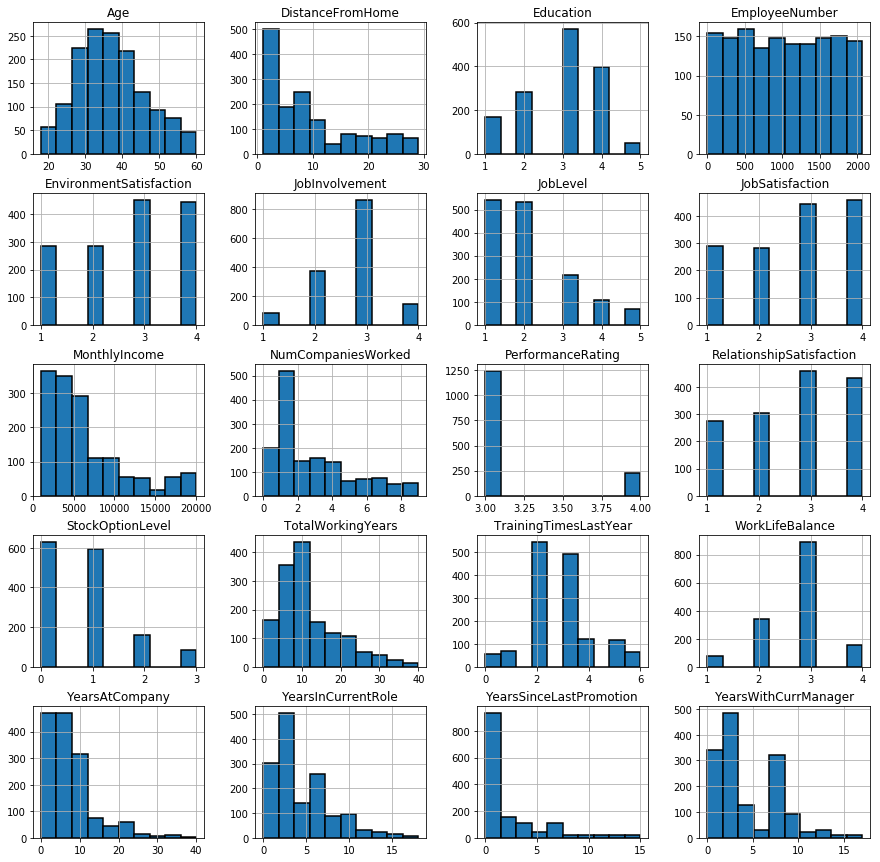

In [102]:
## Data Visualization for numerical data
#print(categorical_col)
#print(numeric_col)
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(15, 15))
plt.show()

In [103]:
X = np.array(raw_data["TotalWorkingYears"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))

y = 467.658412 * X + 1227.935288


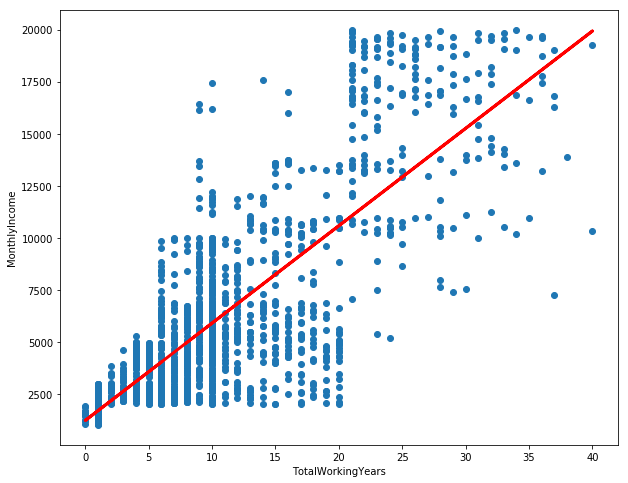

In [104]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.plot(raw_data["TotalWorkingYears"], pred, color="red", linewidth = 3)
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.show()

In [105]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

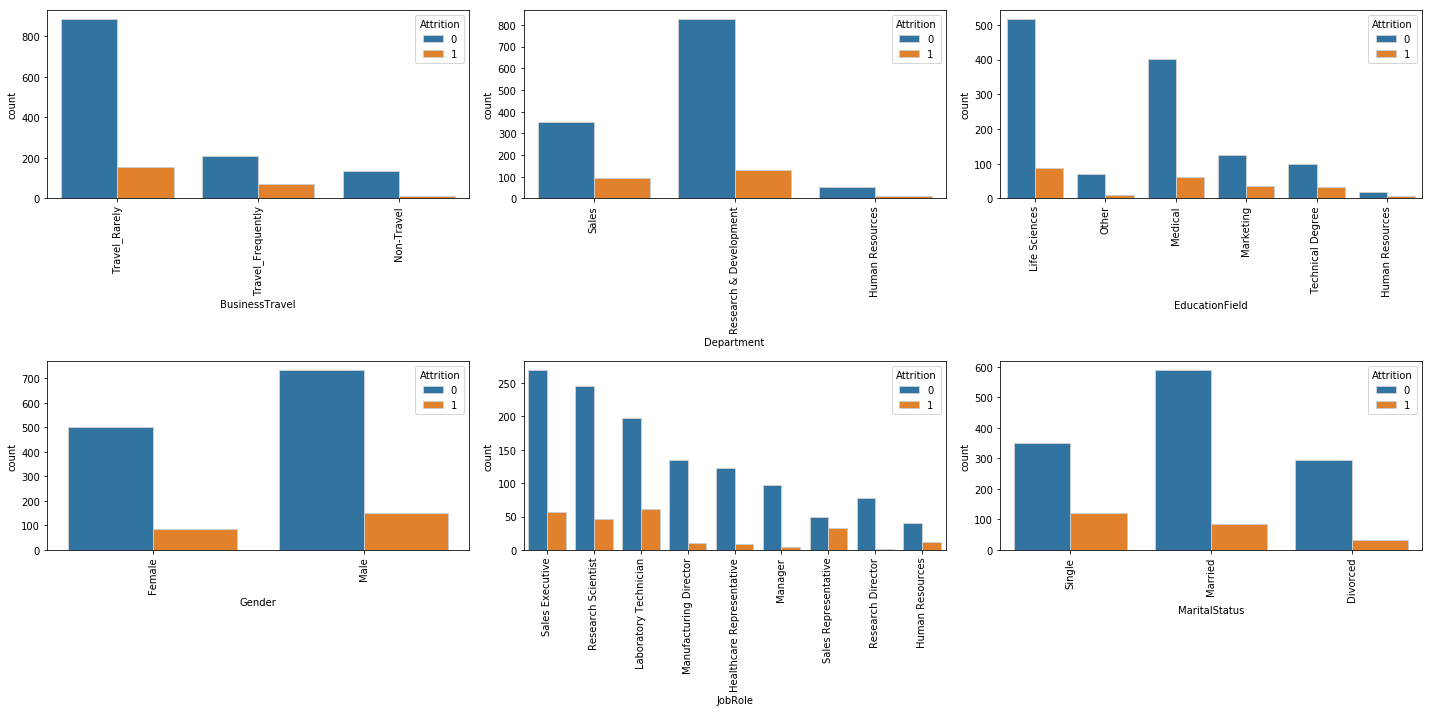

In [125]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".8", data=raw_data, ax=axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=90)
plt.tight_layout()
plt.show()

In [107]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

In [108]:
#print(one_hot_encoding_df)

In [109]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [110]:
set(one_hot_encoding_df.columns) - set(numeric_col)

{'Attrition',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single'}

In [111]:
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

In [137]:
## Data Splitting and Model Learning (Decision Tree)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=10)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    #print(train_index)
    #print(test_index)
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.iloc[train_index, one_hot_encoding_df.columns != 'Attrition']
    #print(train_X)
    train_y = one_hot_encoding_df.iloc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.iloc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.iloc[test_index]["Attrition"]
    
    over_sample_train_X, over_sample_train_y = SMOTE(random_state=42).fit_sample(train_X, train_y)
    
    
    model = DecisionTreeClassifier(random_state=200)
    model = model.fit(over_sample_train_X, over_sample_train_y)
    test_predict = model.predict(test_X)
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1323, Testing Data: 147
Fold: 1, Accuracy: 0.762000, Precision: 0.320000, Recall: 0.308000, F1: 0.314000
Training Data: 1323, Testing Data: 147
Fold: 2, Accuracy: 0.776000, Precision: 0.342000, Recall: 0.619000, F1: 0.441000
Training Data: 1323, Testing Data: 147
Fold: 3, Accuracy: 0.782000, Precision: 0.292000, Recall: 0.318000, F1: 0.304000
Training Data: 1323, Testing Data: 147
Fold: 4, Accuracy: 0.762000, Precision: 0.281000, Recall: 0.429000, F1: 0.340000
Training Data: 1323, Testing Data: 147
Fold: 5, Accuracy: 0.687000, Precision: 0.311000, Recall: 0.483000, F1: 0.378000
Training Data: 1323, Testing Data: 147
Fold: 6, Accuracy: 0.741000, Precision: 0.375000, Recall: 0.400000, F1: 0.387000
Training Data: 1323, Testing Data: 147
Fold: 7, Accuracy: 0.735000, Precision: 0.250000, Recall: 0.348000, F1: 0.291000
Training Data: 1323, Testing Data: 147
Fold: 8, Accuracy: 0.776000, Precision: 0.261000, Recall: 0.273000, F1: 0.267000
Training Data: 1323, Testing Data: 147
F

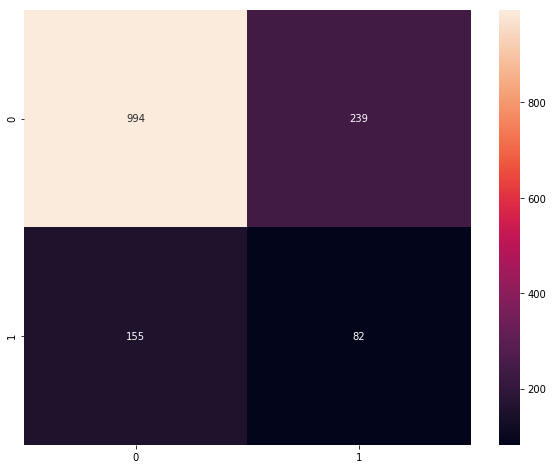

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [114]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('StockOptionLevel', 0.12362917419575319),
 ('MonthlyIncome', 0.08730408093821665),
 ('JobSatisfaction', 0.07107210698664206),
 ('MaritalStatus_Married', 0.04384859915913074),
 ('MaritalStatus_Divorced', 0.04376025097661547),
 ('RelationshipSatisfaction', 0.0430197220423501),
 ('EducationField_Medical', 0.040920861407792664),
 ('EmployeeNumber', 0.03797257742454703),
 ('DistanceFromHome', 0.03468461756630885),
 ('EnvironmentSatisfaction', 0.034583195844166185)]

In [115]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=10)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.iloc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.iloc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.iloc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.iloc[test_index]["Attrition"]

    over_sample_train_X, over_sample_train_y = SMOTE(random_state=42).fit_sample(train_X, train_y)
    
    model = RandomForestClassifier(n_estimators=300, criterion='entropy')
    model = model.fit(over_sample_train_X, over_sample_train_y)
    test_predict = model.predict(test_X)
    
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1323, Testing Data: 147
Fold: 1, Accuracy: 0.850000, Precision: 0.833000, Recall: 0.192000, F1: 0.312000
Training Data: 1323, Testing Data: 147
Fold: 2, Accuracy: 0.878000, Precision: 0.800000, Recall: 0.190000, F1: 0.308000
Training Data: 1323, Testing Data: 147
Fold: 3, Accuracy: 0.864000, Precision: 0.600000, Recall: 0.273000, F1: 0.375000
Training Data: 1323, Testing Data: 147
Fold: 4, Accuracy: 0.850000, Precision: 0.455000, Recall: 0.238000, F1: 0.312000
Training Data: 1323, Testing Data: 147
Fold: 5, Accuracy: 0.816000, Precision: 0.571000, Recall: 0.276000, F1: 0.372000
Training Data: 1323, Testing Data: 147
Fold: 6, Accuracy: 0.789000, Precision: 0.444000, Recall: 0.133000, F1: 0.205000
Training Data: 1323, Testing Data: 147
Fold: 7, Accuracy: 0.878000, Precision: 0.692000, Recall: 0.391000, F1: 0.500000
Training Data: 1323, Testing Data: 147
Fold: 8, Accuracy: 0.844000, Precision: 0.462000, Recall: 0.273000, F1: 0.343000
Training Data: 1323, Testing Data: 147
F

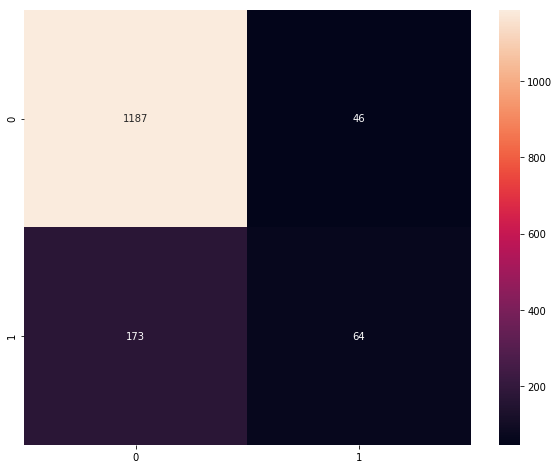

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [117]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('MonthlyIncome', 0.059881411132325625),
 ('StockOptionLevel', 0.049178309731214634),
 ('MaritalStatus_Married', 0.04533946610927273),
 ('JobSatisfaction', 0.04517564116411935),
 ('EmployeeNumber', 0.041886415270619884),
 ('JobInvolvement', 0.04036161811247812),
 ('EnvironmentSatisfaction', 0.03967735565137613),
 ('Age', 0.03938415313135809),
 ('DistanceFromHome', 0.03663073051138401),
 ('YearsWithCurrManager', 0.03624065836543992)]

In [126]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=10)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.iloc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.iloc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.iloc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.iloc[test_index]["Attrition"]
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1323, Testing Data: 147
Fold: 1, Accuracy: 0.850000, Precision: 0.833000, Recall: 0.192000, F1: 0.312000
Training Data: 1323, Testing Data: 147
Fold: 2, Accuracy: 0.871000, Precision: 0.625000, Recall: 0.238000, F1: 0.345000
Training Data: 1323, Testing Data: 147
Fold: 3, Accuracy: 0.850000, Precision: 0.500000, Recall: 0.136000, F1: 0.214000
Training Data: 1323, Testing Data: 147
Fold: 4, Accuracy: 0.871000, Precision: 0.583000, Recall: 0.333000, F1: 0.424000
Training Data: 1323, Testing Data: 147
Fold: 5, Accuracy: 0.823000, Precision: 0.714000, Recall: 0.172000, F1: 0.278000
Training Data: 1323, Testing Data: 147
Fold: 6, Accuracy: 0.803000, Precision: 0.571000, Recall: 0.133000, F1: 0.216000
Training Data: 1323, Testing Data: 147
Fold: 7, Accuracy: 0.878000, Precision: 0.857000, Recall: 0.261000, F1: 0.400000
Training Data: 1323, Testing Data: 147
Fold: 8, Accuracy: 0.871000, Precision: 0.714000, Recall: 0.227000, F1: 0.345000
Training Data: 1323, Testing Data: 147
F

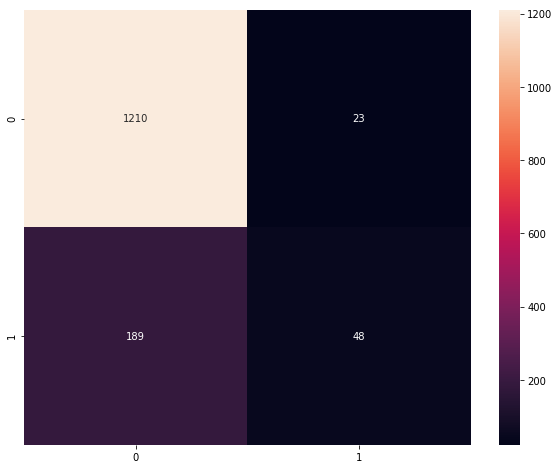

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [175]:
## Data Splitting and Model Learning (SVM)
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=10)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.iloc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.iloc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.iloc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.iloc[test_index]["Attrition"]
    
    over_sample_train_X, over_sample_train_y = SMOTE(random_state=50).fit_sample(train_X, train_y) #best
    #over_sample_train_X, over_sample_train_y = SMOTE(random_state=42).fit_sample(train_X, train_y)
    
    #print(over_sample_train_X)
    #print(over_sample_train_y)
    
    model = make_pipeline(StandardScaler(), SVC(kernel='poly', C=3, gamma=0.01, degree=3)) #best=0.41
    #model = make_pipeline(StandardScaler(), SVC(C=3, gamma=0.01, degree=3)) #0.36
    #model = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto')) #worst=0.259 if default kernel is 0.31
    
    model = model.fit(over_sample_train_X, over_sample_train_y)
    
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1323, Testing Data: 147
Fold: 1, Accuracy: 0.830000, Precision: 0.520000, Recall: 0.500000, F1: 0.510000
Training Data: 1323, Testing Data: 147
Fold: 2, Accuracy: 0.823000, Precision: 0.391000, Recall: 0.429000, F1: 0.409000
Training Data: 1323, Testing Data: 147
Fold: 3, Accuracy: 0.850000, Precision: 0.500000, Recall: 0.364000, F1: 0.421000
Training Data: 1323, Testing Data: 147
Fold: 4, Accuracy: 0.864000, Precision: 0.529000, Recall: 0.429000, F1: 0.474000
Training Data: 1323, Testing Data: 147
Fold: 5, Accuracy: 0.776000, Precision: 0.400000, Recall: 0.276000, F1: 0.327000
Training Data: 1323, Testing Data: 147
Fold: 6, Accuracy: 0.782000, Precision: 0.450000, Recall: 0.300000, F1: 0.360000
Training Data: 1323, Testing Data: 147
Fold: 7, Accuracy: 0.803000, Precision: 0.393000, Recall: 0.478000, F1: 0.431000
Training Data: 1323, Testing Data: 147
Fold: 8, Accuracy: 0.810000, Precision: 0.400000, Recall: 0.545000, F1: 0.462000
Training Data: 1323, Testing Data: 147
F

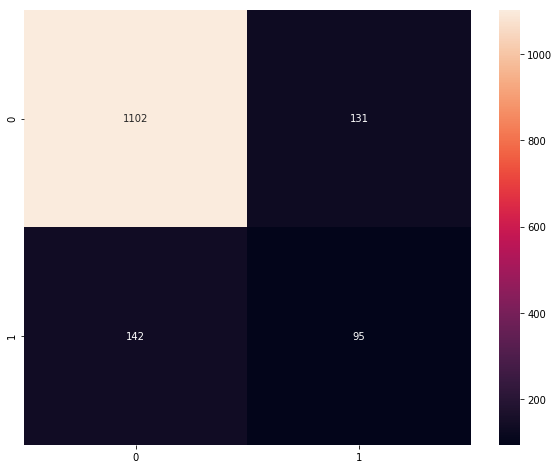

In [176]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()